In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install ultralytics roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 25.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 80.2 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.10.0 requires tensorflow==2.17.0, but you have tensorflow 2.17.1 which is incompatible.


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="LtGiS2TTwXCu3OaccpAs")
project = rf.workspace("biocomputacion1-f4qdt").project("pneumonia-and-normal")
version = project.version(3)
dataset = version.download("yolov8")
                

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to pneumonia-and-normal--3 in yolov8:: 100%|██████████| 6012/6012 [00:00<00:00, 7804.46it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
import os

def count_images_and_labels(dataset_path, split):
    images_path = os.path.join(dataset_path, split, "images")
    labels_path = os.path.join(dataset_path, split, "labels")

    num_images = len(os.listdir(images_path)) if os.path.exists(images_path) else 0
    num_labels = len(os.listdir(labels_path)) if os.path.exists(labels_path) else 0

    print(f"  📁 {split.capitalize()} Images  --> {num_images} files")
    print(f"  📁 {split.capitalize()} Labels  --> {num_labels} files")

def analyze_dataset(dataset_path):
    print(f"\n📂 Dataset Path: {dataset_path}")
    for split in ["train", "valid", "test"]:
        count_images_and_labels(dataset_path, split)
    print("-" * 50)

# Replace with actual dataset paths
dataset1_path = "/kaggle/working/pneumonia-and-normal--3"

print("🔍 Dataset 1 Structure:")
analyze_dataset(dataset1_path)


🔍 Dataset 1 Structure:

📂 Dataset Path: /kaggle/working/pneumonia-and-normal--3
  📁 Train Images  --> 2625 files
  📁 Train Labels  --> 2625 files
  📁 Valid Images  --> 250 files
  📁 Valid Labels  --> 250 files
  📁 Test Images  --> 125 files
  📁 Test Labels  --> 125 files
--------------------------------------------------


In [7]:
!rm -rf /kaggle/working/pneumonia-and-normal--3
from roboflow import Roboflow
rf = Roboflow(api_key="LtGiS2TTwXCu3OaccpAs")  # Replace with your actual API key
project = rf.workspace("biocomputacion1-f4qdt").project("pneumonia-and-normal")
version = project.version(3)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to pneumonia-and-normal--3 in yolov8:: 100%|██████████| 6012/6012 [00:00<00:00, 8316.58it/s]


In [4]:

base_path = "/kaggle/working/pneumonia-and-normal--3"
for split in ["train", "valid", "test"]:
    img_path = os.path.join(base_path, split, "images")
    label_path = os.path.join(base_path, split, "labels")

    img_files = set(f.replace(".jpg", "").replace(".png", "") for f in os.listdir(img_path))
    label_files = set(f.replace(".txt", "") for f in os.listdir(label_path))

    missing_labels = img_files - label_files
    missing_images = label_files - img_files

    print(f"🔍 Checking {split} set:")
    print(f"✅ Images: {len(img_files)} | ✅ Labels: {len(label_files)}")
    print(f"❌ Missing Labels: {len(missing_labels)} | ❌ Missing Images: {len(missing_images)}")


🔍 Checking train set:
✅ Images: 2625 | ✅ Labels: 2625
❌ Missing Labels: 0 | ❌ Missing Images: 0
🔍 Checking valid set:
✅ Images: 250 | ✅ Labels: 250
❌ Missing Labels: 0 | ❌ Missing Images: 0
🔍 Checking test set:
✅ Images: 125 | ✅ Labels: 125
❌ Missing Labels: 0 | ❌ Missing Images: 0


In [5]:
!mkdir -p /kaggle/working/pneumonia-and-normal--3/{valid,test}/{images,labels}


In [6]:
import os
import shutil
import random

# Paths
base_path = "/kaggle/working/pneumonia-and-normal--3"
train_images = os.path.join(base_path, "train/images")
train_labels = os.path.join(base_path, "train/labels")
valid_images = os.path.join(base_path, "valid/images")
valid_labels = os.path.join(base_path, "valid/labels")

# Get all images and labels
image_files = [f.replace(".jpg", "").replace(".png", "") for f in os.listdir(train_images)]
label_files = [f.replace(".txt", "") for f in os.listdir(train_labels)]

# Find only matching pairs
matching_files = list(set(image_files) & set(label_files))
random.shuffle(matching_files)  # Shuffle before selection

# Select 300 files for validation
valid_files = matching_files[:300]

# Move images and corresponding labels
for file in valid_files:
    shutil.move(os.path.join(train_images, file + ".jpg"), valid_images)
    shutil.move(os.path.join(train_labels, file + ".txt"), valid_labels)

print(f"✅ Moved {len(valid_files)} images and labels to validation set.")


✅ Moved 300 images and labels to validation set.


In [7]:
test_images = os.path.join(base_path, "test/images")
test_labels = os.path.join(base_path, "test/labels")

# Get remaining files after validation move
image_files = [f.replace(".jpg", "").replace(".png", "") for f in os.listdir(train_images)]
label_files = [f.replace(".txt", "") for f in os.listdir(train_labels)]

# Find only matching pairs
matching_files = list(set(image_files) & set(label_files))
random.shuffle(matching_files)

# Select 175 files for testing
test_files = matching_files[:175]

# Move images and corresponding labels
for file in test_files:
    shutil.move(os.path.join(train_images, file + ".jpg"), test_images)
    shutil.move(os.path.join(train_labels, file + ".txt"), test_labels)

print(f"✅ Moved {len(test_files)} images and labels to test set.")


✅ Moved 175 images and labels to test set.


In [8]:

base_path = "/kaggle/working/pneumonia-and-normal--3"
for split in ["train", "valid", "test"]:
    img_path = os.path.join(base_path, split, "images")
    label_path = os.path.join(base_path, split, "labels")

    img_files = set(f.replace(".jpg", "").replace(".png", "") for f in os.listdir(img_path))
    label_files = set(f.replace(".txt", "") for f in os.listdir(label_path))

    missing_labels = img_files - label_files
    missing_images = label_files - img_files

    print(f"🔍 Checking {split} set:")
    print(f"✅ Images: {len(img_files)} | ✅ Labels: {len(label_files)}")
    print(f"❌ Missing Labels: {len(missing_labels)} | ❌ Missing Images: {len(missing_images)}")


🔍 Checking train set:
✅ Images: 2150 | ✅ Labels: 2150
❌ Missing Labels: 0 | ❌ Missing Images: 0
🔍 Checking valid set:
✅ Images: 550 | ✅ Labels: 550
❌ Missing Labels: 0 | ❌ Missing Images: 0
🔍 Checking test set:
✅ Images: 300 | ✅ Labels: 300
❌ Missing Labels: 0 | ❌ Missing Images: 0


In [9]:
!pip install ultralytics albumentations


from ultralytics import YOLO
import torch
import os


In [14]:
import albumentations as A
import cv2
import numpy as np
import os
from glob import glob
from tqdm import tqdm

# Augmentation pipeline
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.3),
    A.RandomBrightnessContrast(p=0.2),
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
    A.GaussianBlur(blur_limit=(3,7), p=0.3),
    A.ElasticTransform(p=0.3),
])

# Path to images
train_images = glob("/kaggle/working/pneumonia-and-normal--3/train/images/*.jpg")

# Augment and save new images
augmented_dir = "/kaggle/working/pneumonia-and-normal--3/train/images_augmented/"
os.makedirs(augmented_dir, exist_ok=True)

for img_path in tqdm(train_images):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Apply augmentation
    augmented = transform(image=img)["image"]

    # Save augmented image
    new_img_path = os.path.join(augmented_dir, os.path.basename(img_path).replace(".jpg", "_aug.jpg"))
    cv2.imwrite(new_img_path, cv2.cvtColor(augmented, cv2.COLOR_RGB2BGR))


A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
100%|██████████| 2150/2150 [00:23<00:00, 90.74it/s] 


In [19]:
from ultralytics import YOLO
import torch

# Path to dataset YAML
DATA_YAML = "/kaggle/working/pneumonia-and-normal--3/data.yaml"

# Load model
model = YOLO("yolov8m.pt")  # Medium model (better than small)

# Train with optimizations
model.train(
    data=DATA_YAML,
    epochs=30,           # Increase for better learning
    imgsz=640,           # Image size
    batch=16,            # Increase if GPU allows
    device=0 if torch.cuda.is_available() else "cpu",
    patience=5,
    lr0=0.005,           # Lower learning rate
    momentum=0.937,      # Optimized for stability
    weight_decay=0.0005, # Prevents overfitting
    optimizer="AdamW",   # Better for generalization
    augment=True,        # Enable built-in augmentation
    hsv_h=0.015,         # HSV hue augmentation
    hsv_s=0.7,           # HSV saturation augmentation
    hsv_v=0.4,           # HSV value augmentation
    flipud=0.5,          # Vertical flip probability
    fliplr=0.5           # Horizontal flip probability
)


100%|██████████| 49.7M/49.7M [00:00<00:00, 256MB/s]


Ultralytics 8.3.89 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/working/pneumonia-and-normal--3/data.yaml, epochs=30, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

100%|██████████| 755k/755k [00:00<00:00, 17.5MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 76.0MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/pneumonia-and-normal--3/train/labels... 2150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2150/2150 [00:01<00:00, 1085.34it/s]


train: New cache created: /kaggle/working/pneumonia-and-normal--3/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/pneumonia-and-normal--3/valid/labels... 550 images, 0 backgrounds, 0 corrupt: 100%|██████████| 550/550 [00:00<00:00, 1377.51it/s]


val: New cache created: /kaggle/working/pneumonia-and-normal--3/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      6.38G      1.094      1.248      1.548         58        640: 100%|██████████| 135/135 [01:06<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:08<00:00,  2.07it/s]


                   all        550       1610      0.661      0.544      0.655      0.363

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      7.54G     0.9871     0.9131      1.436         54        640: 100%|██████████| 135/135 [01:08<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.42it/s]

                   all        550       1610      0.785      0.859      0.903      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      7.54G     0.9629     0.8437      1.408         46        640: 100%|██████████| 135/135 [01:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.41it/s]

                   all        550       1610      0.831      0.867      0.887      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      7.54G      0.935     0.7945      1.386         31        640: 100%|██████████| 135/135 [01:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.41it/s]

                   all        550       1610      0.903      0.923      0.958      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      7.54G     0.8837     0.7278      1.345         37        640: 100%|██████████| 135/135 [01:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.42it/s]

                   all        550       1610      0.914       0.94      0.964      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      7.54G     0.8476     0.6819      1.326         45        640: 100%|██████████| 135/135 [01:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.40it/s]

                   all        550       1610      0.844      0.914      0.922      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      7.54G     0.8394     0.6732      1.313         41        640: 100%|██████████| 135/135 [01:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.41it/s]

                   all        550       1610      0.838      0.897      0.922      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      7.54G     0.8198     0.6419      1.296         48        640: 100%|██████████| 135/135 [01:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.41it/s]

                   all        550       1610      0.826      0.929      0.949      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      7.54G     0.7865     0.6146      1.274         50        640: 100%|██████████| 135/135 [01:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.40it/s]

                   all        550       1610      0.905      0.956      0.968       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      7.54G     0.7844     0.5925      1.271         45        640: 100%|██████████| 135/135 [01:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.40it/s]

                   all        550       1610       0.92       0.96      0.971      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      7.54G     0.7779     0.5909      1.272         30        640: 100%|██████████| 135/135 [01:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.40it/s]

                   all        550       1610      0.794      0.941      0.947      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      7.54G     0.7572     0.5794      1.249         50        640: 100%|██████████| 135/135 [01:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.40it/s]

                   all        550       1610      0.848      0.949      0.946      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      7.54G     0.7436     0.5603      1.247         31        640: 100%|██████████| 135/135 [01:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.40it/s]

                   all        550       1610      0.886      0.917       0.96      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      7.54G       0.72     0.5424      1.226         41        640: 100%|██████████| 135/135 [01:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.41it/s]

                   all        550       1610      0.877       0.92      0.947      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      7.54G     0.7195     0.5308      1.227         50        640: 100%|██████████| 135/135 [01:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.41it/s]

                   all        550       1610      0.878      0.948       0.96       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      7.54G     0.7082     0.5126      1.217         39        640: 100%|██████████| 135/135 [01:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.40it/s]

                   all        550       1610      0.936      0.968      0.979      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      7.54G     0.6978     0.5111      1.209         37        640: 100%|██████████| 135/135 [01:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.40it/s]

                   all        550       1610      0.937      0.965      0.975      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      7.54G     0.6929     0.4949      1.206         56        640: 100%|██████████| 135/135 [01:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.42it/s]

                   all        550       1610      0.935      0.975      0.979      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      7.54G     0.6794     0.4828      1.198         43        640: 100%|██████████| 135/135 [01:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.41it/s]

                   all        550       1610      0.934      0.977      0.975       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      7.54G     0.6703     0.4728      1.191         32        640: 100%|██████████| 135/135 [01:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.41it/s]

                   all        550       1610      0.934      0.979      0.976      0.786


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      7.54G     0.5849      0.392      1.245         18        640: 100%|██████████| 135/135 [01:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.40it/s]

                   all        550       1610      0.909      0.956      0.969      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      7.54G     0.5638     0.3639      1.232         18        640: 100%|██████████| 135/135 [01:07<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.41it/s]

                   all        550       1610      0.721      0.995      0.939      0.778
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 17, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



22 epochs completed in 0.467 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.89 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:15<00:00,  1.13it/s]


                   all        550       1610      0.939      0.977      0.976      0.804
                NORMAL        213        601      0.882      0.997       0.96      0.786
             PNEUMONIA        337       1009      0.996      0.956      0.992      0.823


invalid value encountered in less
invalid value encountered in less


Speed: 0.2ms preprocess, 24.2ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f03ace245b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

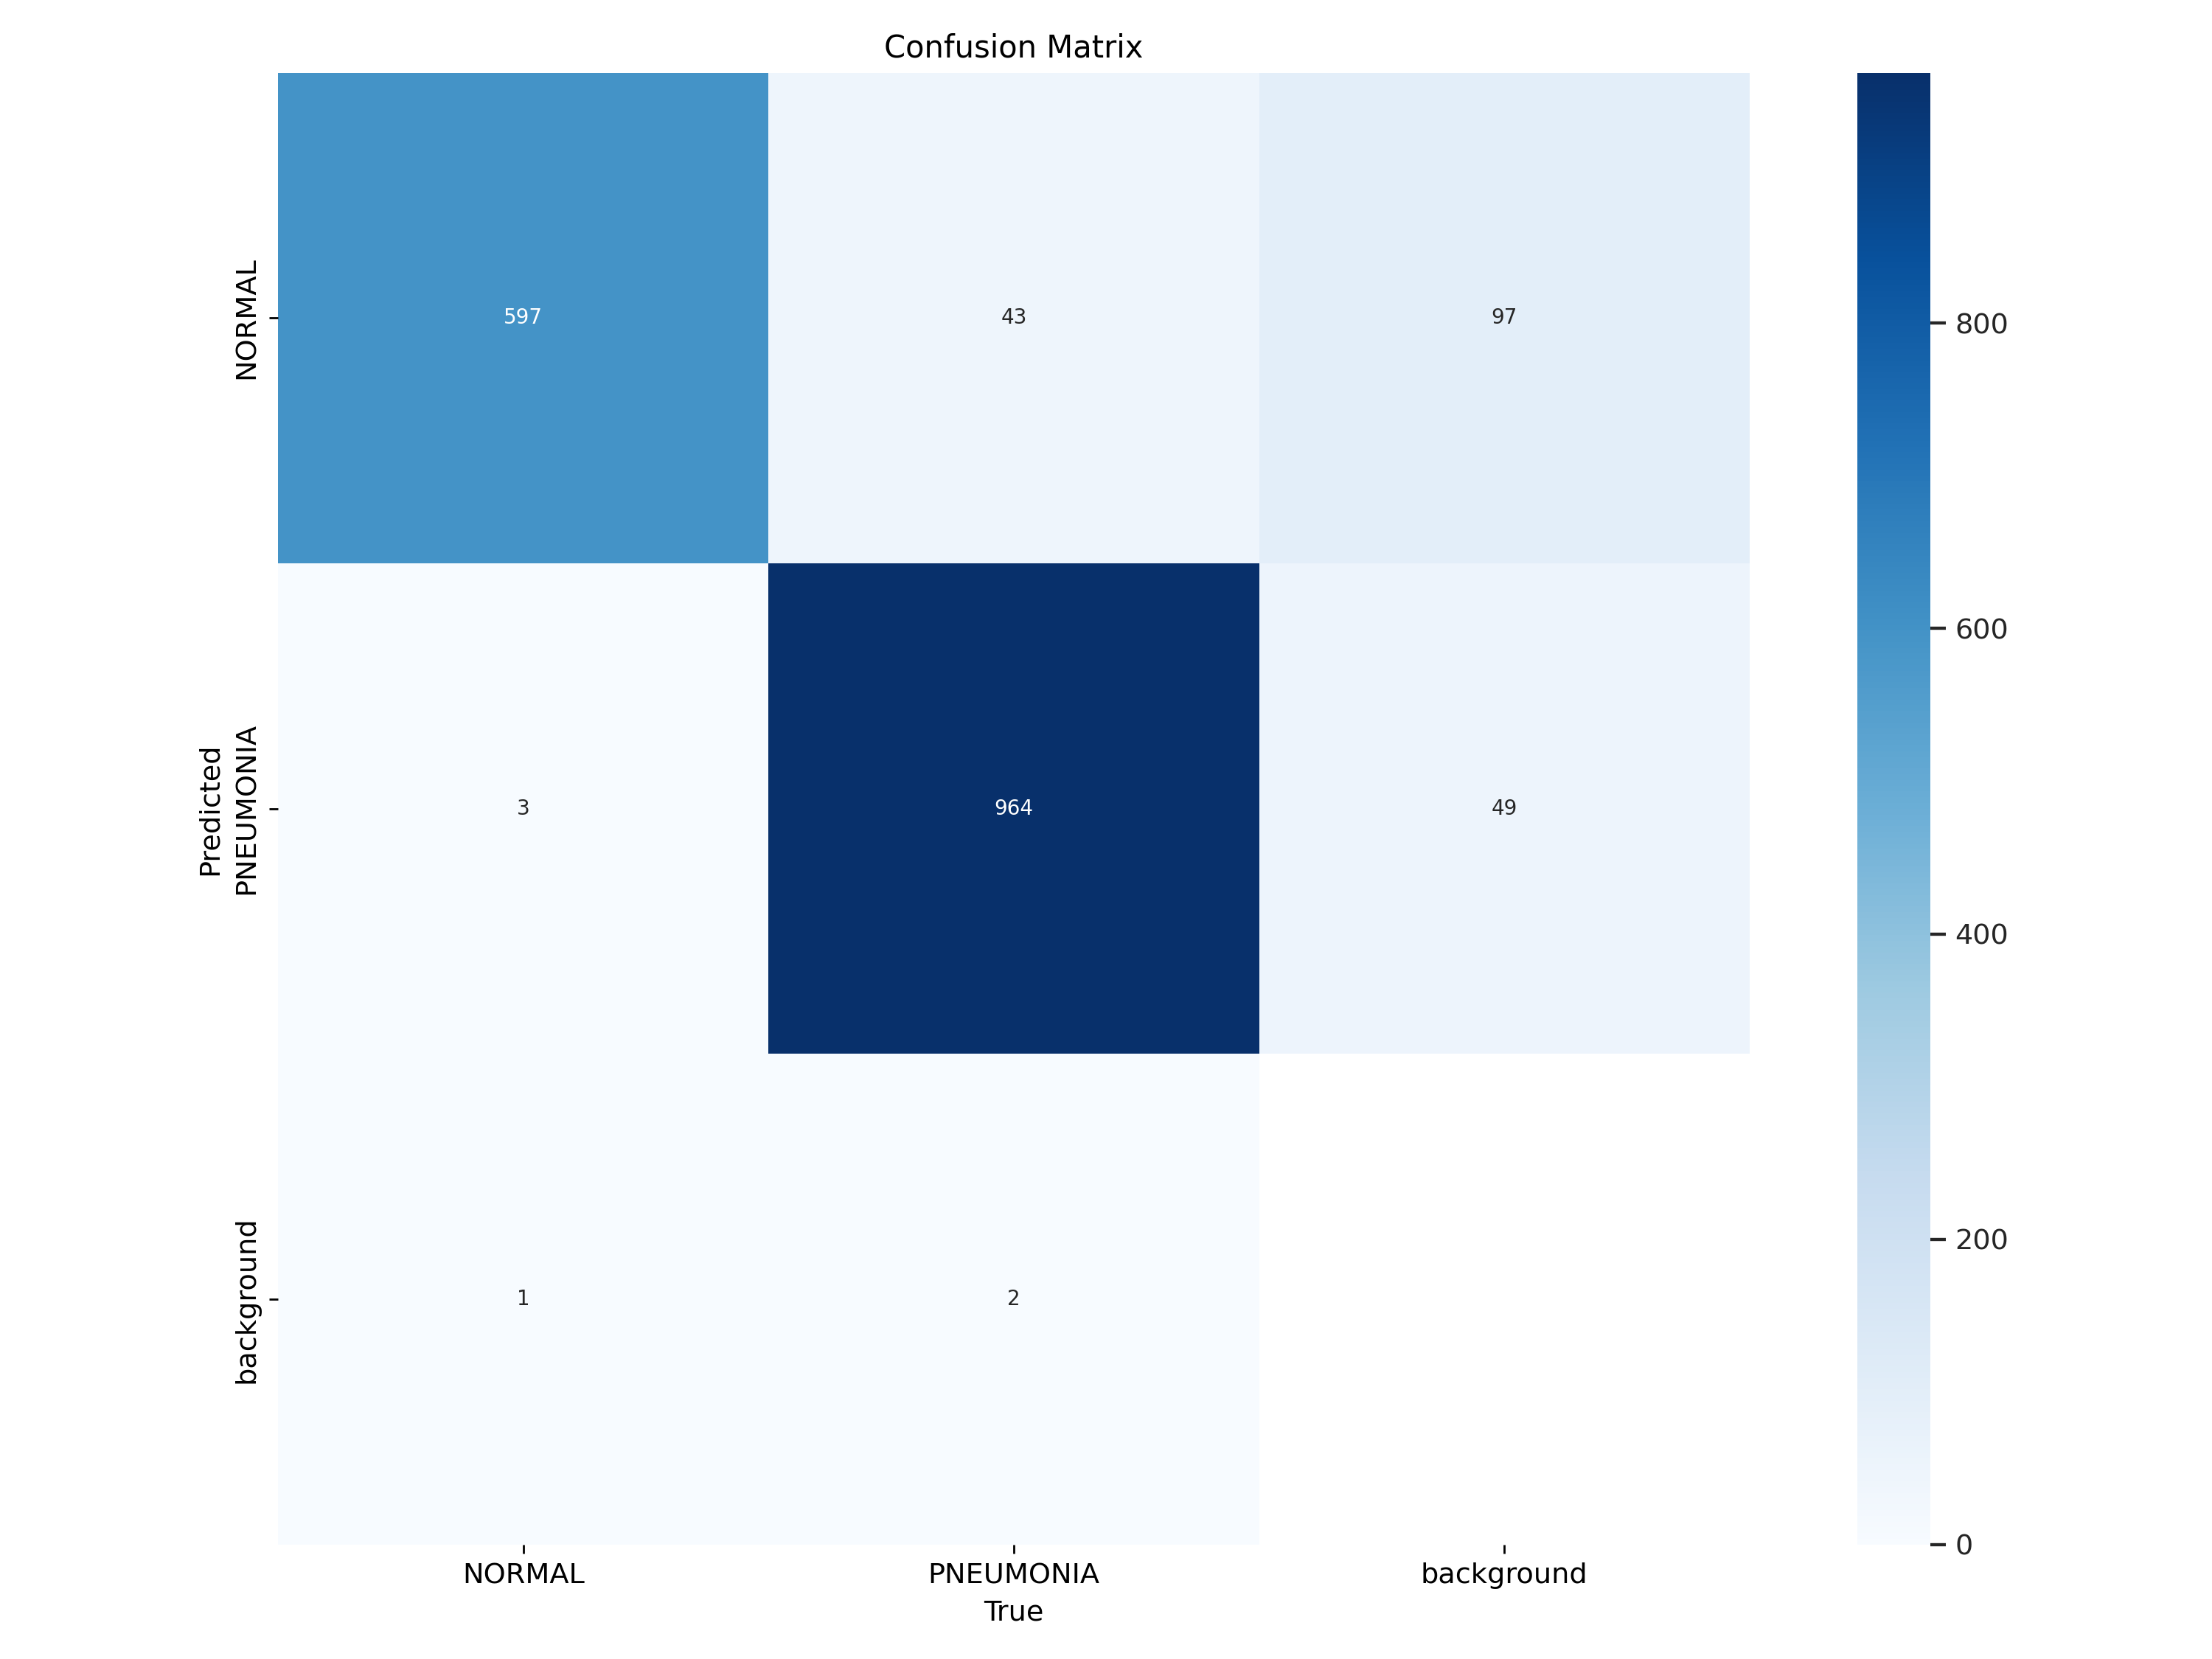

In [20]:
from IPython.display import Image

# Replace "exp" with the correct folder name if you ran multiple validations
Image(filename="/kaggle/working/runs/detect/train/confusion_matrix.png")


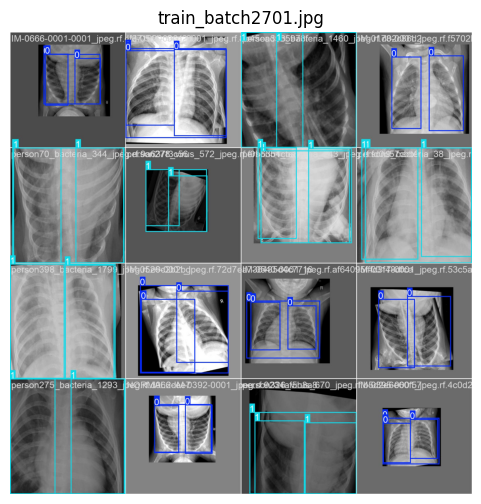

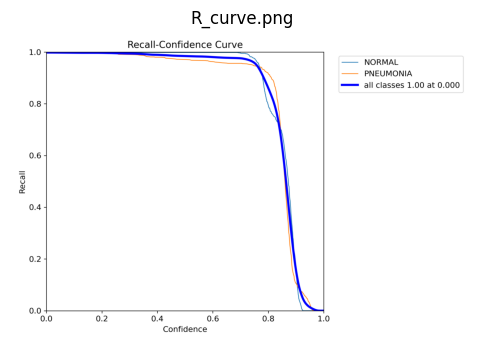

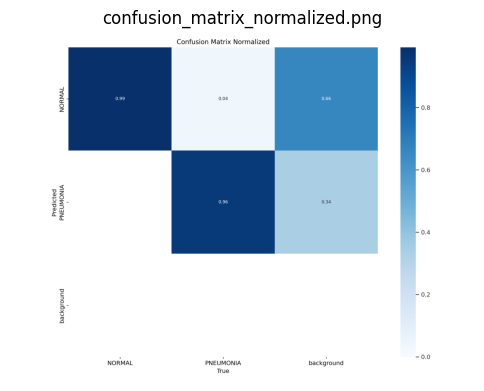

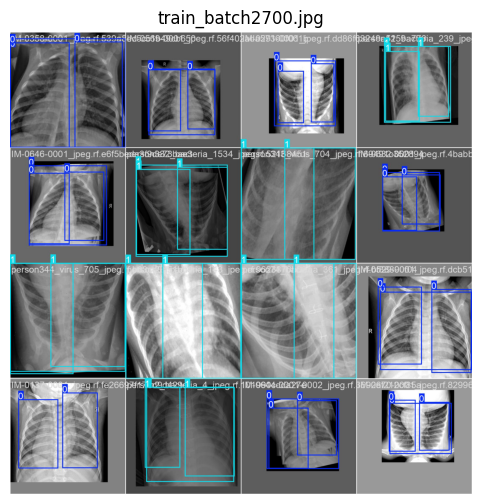

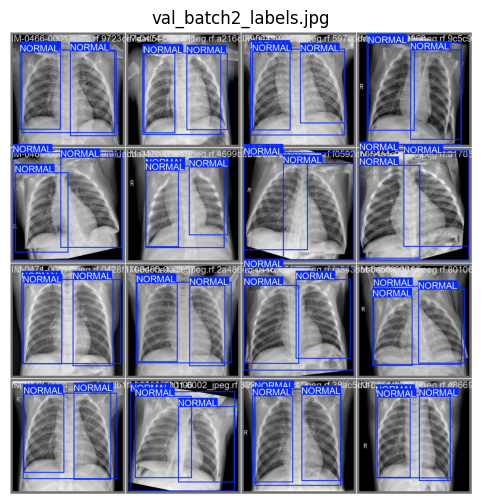

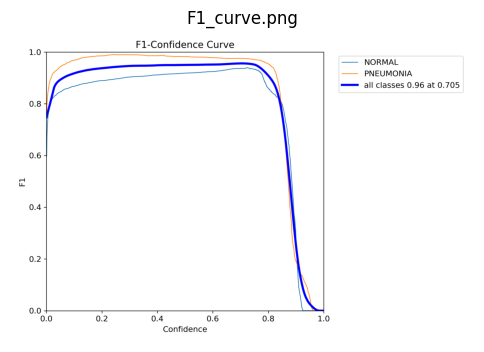

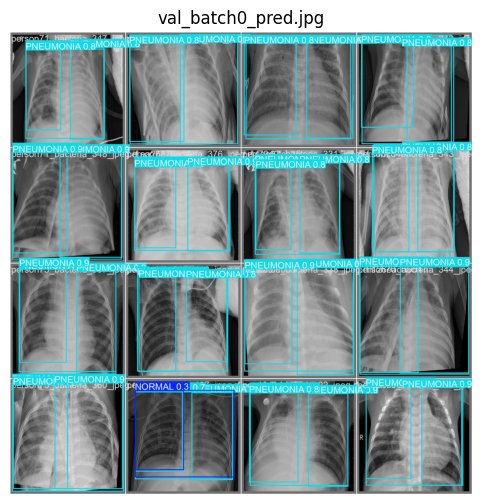

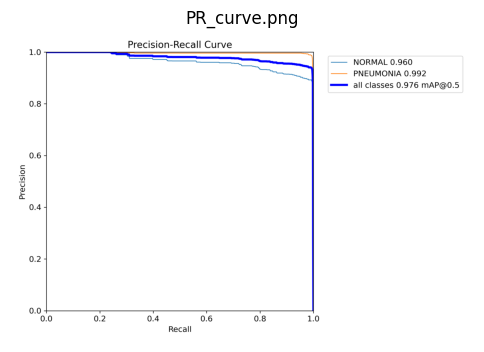

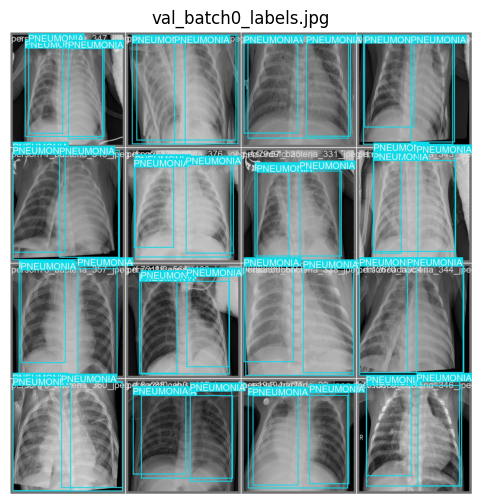

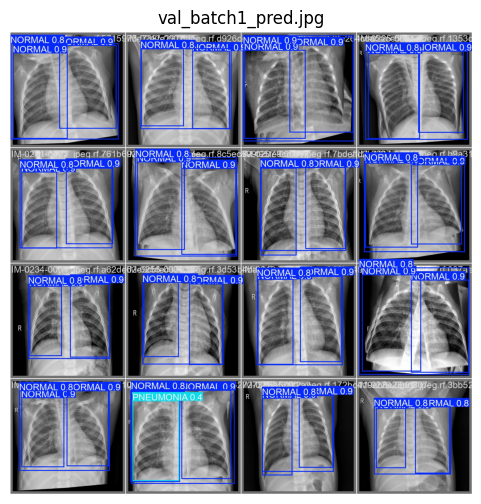

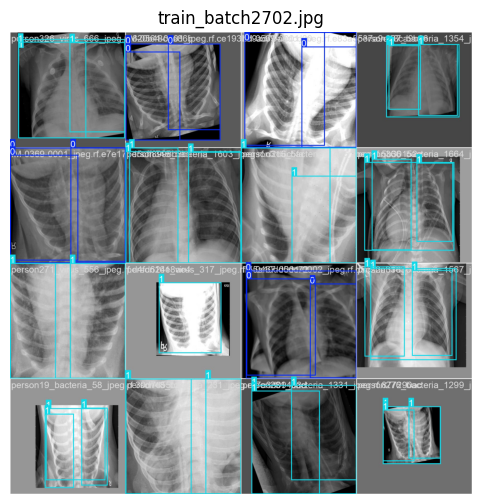

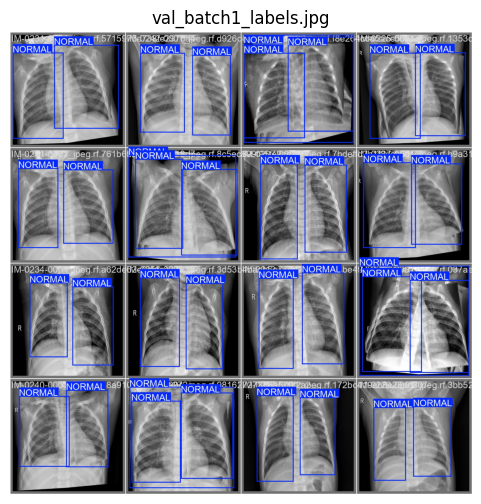

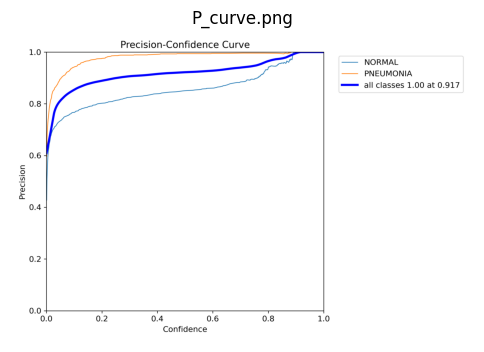

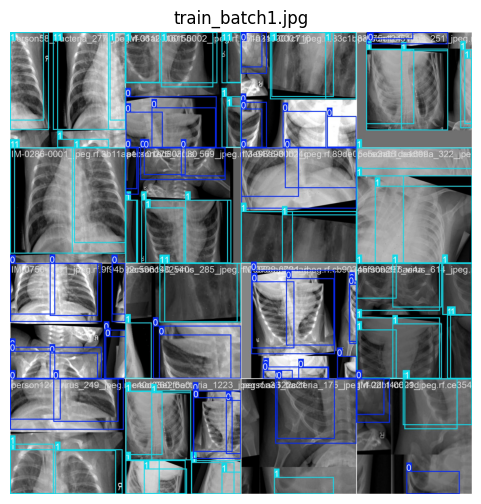

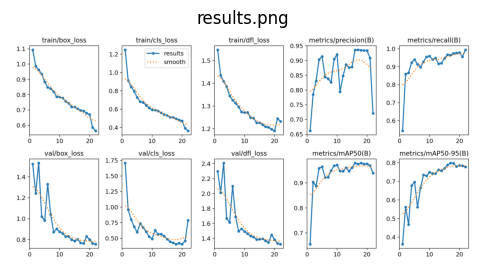

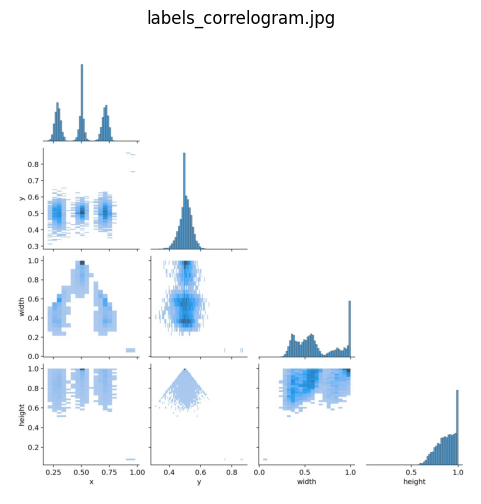

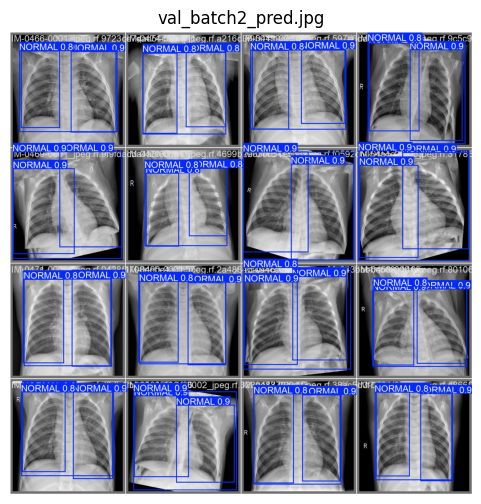

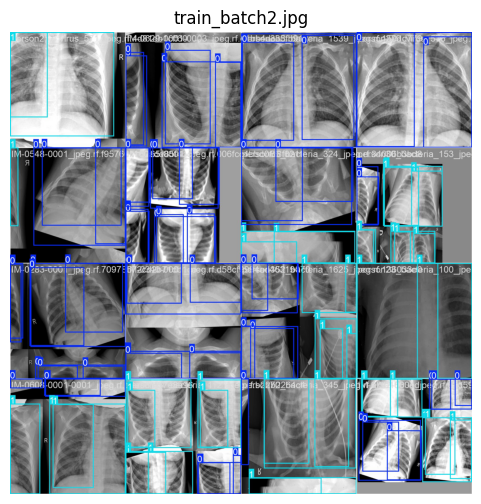

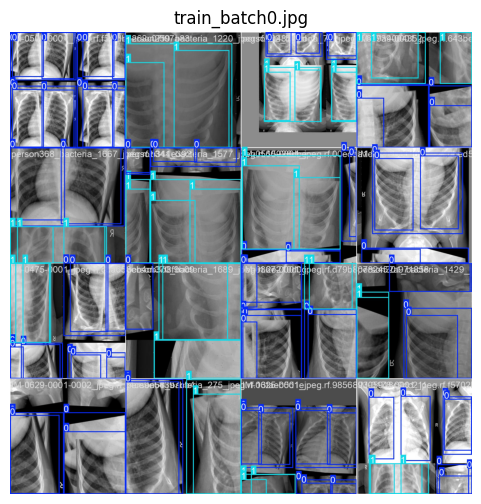

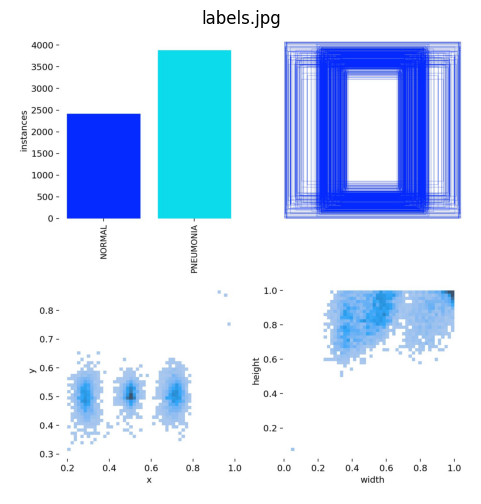

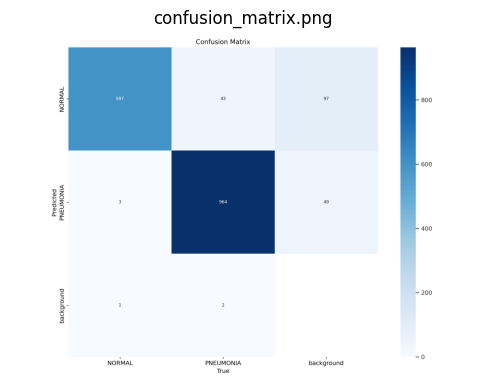

In [22]:
import os
import matplotlib.pyplot as plt
import cv2
from IPython.display import display

# Path to the directory
image_dir = "/kaggle/working/runs/detect/train/"

# List all image files
image_files = [f for f in os.listdir(image_dir) if f.endswith((".png", ".jpg", ".jpeg"))]

# Display images with filenames
for image_file in image_files:
    img_path = os.path.join(image_dir, image_file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(image_file)
    plt.axis("off")
    display(plt.gcf())  # Show the figure
    plt.close()


In [24]:
from ultralytics import YOLO

# Load the best trained model
best_model_path = "runs/detect/train/weights/best.pt"
model = YOLO(best_model_path)

# ✅ Evaluate on Training Set
train_metrics = model.val(split="train", conf=0.3)
print("\n📊 **Training Set Metrics:**")
print(train_metrics.results_dict)

# ✅ Evaluate on Validation Set
val_metrics = model.val(split="val", conf=0.3)
print("\n📊 **Validation Set Metrics:**")
print(val_metrics.results_dict)

# ✅ Evaluate on Test Set
test_metrics = model.val(split="test", conf=0.3)
print("\n📊 **Test Set Metrics:**")
print(test_metrics.results_dict)



Ultralytics 8.3.89 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /kaggle/working/pneumonia-and-normal--3/train/labels.cache... 2150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2150/2150 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:56<00:00,  2.38it/s]


                   all       2150       6291      0.944      0.975      0.977      0.835
                NORMAL        852       2412      0.896      0.993       0.97      0.823
             PNEUMONIA       1298       3879      0.992      0.958      0.985      0.847


invalid value encountered in less
invalid value encountered in less


Speed: 0.3ms preprocess, 22.1ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/val2

📊 **Training Set Metrics:**
{'metrics/precision(B)': 0.9440114169539562, 'metrics/recall(B)': 0.9752059072731432, 'metrics/mAP50(B)': 0.9773962256164426, 'metrics/mAP50-95(B)': 0.8346993641509443, 'fitness': 0.8489690502974941}
Ultralytics 8.3.89 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /kaggle/working/pneumonia-and-normal--3/valid/labels.cache... 550 images, 0 backgrounds, 0 corrupt: 100%|██████████| 550/550 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:15<00:00,  2.30it/s]


                   all        550       1610      0.937      0.965       0.97      0.804
                NORMAL        213        601      0.879      0.993      0.959      0.803
             PNEUMONIA        337       1009      0.995      0.937      0.981      0.805


invalid value encountered in less
invalid value encountered in less


Speed: 0.9ms preprocess, 22.1ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/val3

📊 **Validation Set Metrics:**
{'metrics/precision(B)': 0.9366625563338494, 'metrics/recall(B)': 0.9653801671566143, 'metrics/mAP50(B)': 0.9698603418464529, 'metrics/mAP50-95(B)': 0.8038993785275336, 'fitness': 0.8204954748594255}
Ultralytics 8.3.89 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /kaggle/working/pneumonia-and-normal--3/test/labels... 300 images, 0 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:00<00:00, 1094.90it/s]

val: New cache created: /kaggle/working/pneumonia-and-normal--3/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.12it/s]


                   all        300        880      0.951      0.963      0.981      0.821
                NORMAL        114        326       0.91      0.988      0.975      0.811
             PNEUMONIA        186        554      0.992      0.939      0.988       0.83


invalid value encountered in less
invalid value encountered in less


Speed: 1.5ms preprocess, 22.3ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val4

📊 **Test Set Metrics:**
{'metrics/precision(B)': 0.9512558457465101, 'metrics/recall(B)': 0.9634174326177996, 'metrics/mAP50(B)': 0.9814131202701886, 'metrics/mAP50-95(B)': 0.8207743328104623, 'fitness': 0.836838211556435}


In [35]:
from tabulate import tabulate

# Metrics data
data = [
    ["Precision", 0.9440, 0.9367, 0.9513],
    ["Recall", 0.9752, 0.9654, 0.9634],
    ["mAP@50", 0.9774, 0.9699, 0.9814],
    ["mAP@50-95", 0.8347, 0.8039, 0.8208],
    ["Fitness", 0.8489, 0.8205, 0.8368],
]

# Table headers
headers = ["Metric", "Training", "Validation", "Testing"]
print('\nPerformance Metrics of YOLO-based Pneumonia Detection Model\n')
# Print formatted table
print(tabulate(data, headers, tablefmt="fancy_grid"))
print('\n')



Performance Metrics of YOLO-based Pneumonia Detection Model

╒═══════════╤════════════╤══════════════╤═══════════╕
│ Metric    │   Training │   Validation │   Testing │
╞═══════════╪════════════╪══════════════╪═══════════╡
│ Precision │     0.944  │       0.9367 │    0.9513 │
├───────────┼────────────┼──────────────┼───────────┤
│ Recall    │     0.9752 │       0.9654 │    0.9634 │
├───────────┼────────────┼──────────────┼───────────┤
│ mAP@50    │     0.9774 │       0.9699 │    0.9814 │
├───────────┼────────────┼──────────────┼───────────┤
│ mAP@50-95 │     0.8347 │       0.8039 │    0.8208 │
├───────────┼────────────┼──────────────┼───────────┤
│ Fitness   │     0.8489 │       0.8205 │    0.8368 │
╘═══════════╧════════════╧══════════════╧═══════════╛





image 1/1 /kaggle/working/pneumonia-and-normal--3/test/images/IM-0467-0001-0002_jpeg.rf.9b09bdc27bad1257a2d688030e7b8496.jpg: 640x640 3 NORMALs, 36.9ms
Speed: 1.7ms preprocess, 36.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
📊 Pneumonia Positive Detections: 0/3 (0.00%)


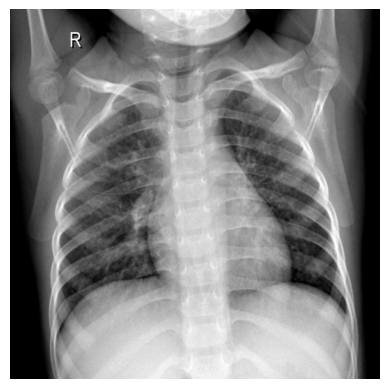

In [30]:

import cv2
import matplotlib.pyplot as plt

# Load the trained model
best_model_path = "runs/detect/train/weights/best.pt"
model = YOLO(best_model_path)

# Test image path
image_path = "/kaggle/working/pneumonia-and-normal--3/test/images/IM-0467-0001-0002_jpeg.rf.9b09bdc27bad1257a2d688030e7b8496.jpg"

# Run inference
results = model(image_path)  

# Read the image
img = cv2.imread(image_path)

# Initialize count for pneumonia-positive detections
pneumonia_count = 0
total_detections = 0

# Loop through results
for r in results:
    for box, cls, conf in zip(r.boxes.xyxy, r.boxes.cls, r.boxes.conf):
        x1, y1, x2, y2 = map(int, box)  # Bounding box coordinates
        label = int(cls)  # Class label
        confidence = float(conf)  # Confidence score

        # Assuming class 1 = Pneumonia Positive (Update based on your dataset classes)
        if label == 1:  
            pneumonia_count += 1
            total_detections += 1

            # Draw bounding box (Green)
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

            # Add label text
            text = f"Pneumonia Positive ({confidence:.2f})"
            cv2.putText(img, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        else:
            total_detections += 1

# Calculate pneumonia percentage
if total_detections > 0:
    pneumonia_percentage = (pneumonia_count / total_detections) * 100
    print(f"📊 Pneumonia Positive Detections: {pneumonia_count}/{total_detections} ({pneumonia_percentage:.2f}%)")
else:
    print("⚠️ No detections found.")


# Convert image to RGB for Matplotlib display
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()



Evaluation Metrics
Accuracy: 0.9703
Precision: 0.9943
Recall (TPR, Sensitivity): 0.9576
Specificity (TNR): 0.9910
False Positive Rate (FPR): 0.0090
False Negative Rate (FNR): 0.0424
F1 Score: 0.9756
AUC-ROC Score: 0.9743








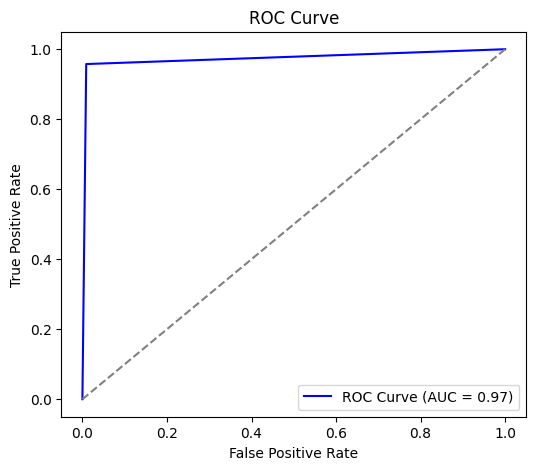

In [26]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Start timer
start_time = time.time()



TP = 520  # Pneumonia correctly detected
FP = 3    # Normal misclassified as Pneumonia
FN = 23   # Pneumonia misclassified as Normal
TN = 330  # Normal correctly classified


# Compute Metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0  # Avoid division by zero
recall = TP / (TP + FN) if (TP + FN) != 0 else 0  # Sensitivity, True Positive Rate (TPR)
specificity = TN / (TN + FP) if (TN + FP) != 0 else 0  # True Negative Rate (TNR)
fpr = FP / (FP + TN) if (FP + TN) != 0 else 0  # False Positive Rate (FPR)
fnr = FN / (FN + TP) if (FN + TP) != 0 else 0  # False Negative Rate (FNR)
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# Compute ROC Curve and AUC
y_true = np.array([1] * (TP + FN) + [0] * (TN + FP))  # 1 for Pneumonia, 0 for Normal
y_scores = np.array([1] * TP + [0] * FN + [0] * TN + [1] * FP)  # Simulating probabilities
fpr_curve, tpr_curve, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr_curve, tpr_curve)

# End timer
end_time = time.time()
val_time = end_time - start_time  # Total validation time

# Print all metrics
print("\nEvaluation Metrics")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (TPR, Sensitivity): {recall:.4f}")
print(f"Specificity (TNR): {specificity:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")
print(f"F1 Score: {f1_score:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")
print('\n\n\n\n\n')
# Plot ROC Curve
plt.figure(figsize=(6,5))
plt.plot(fpr_curve, tpr_curve, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


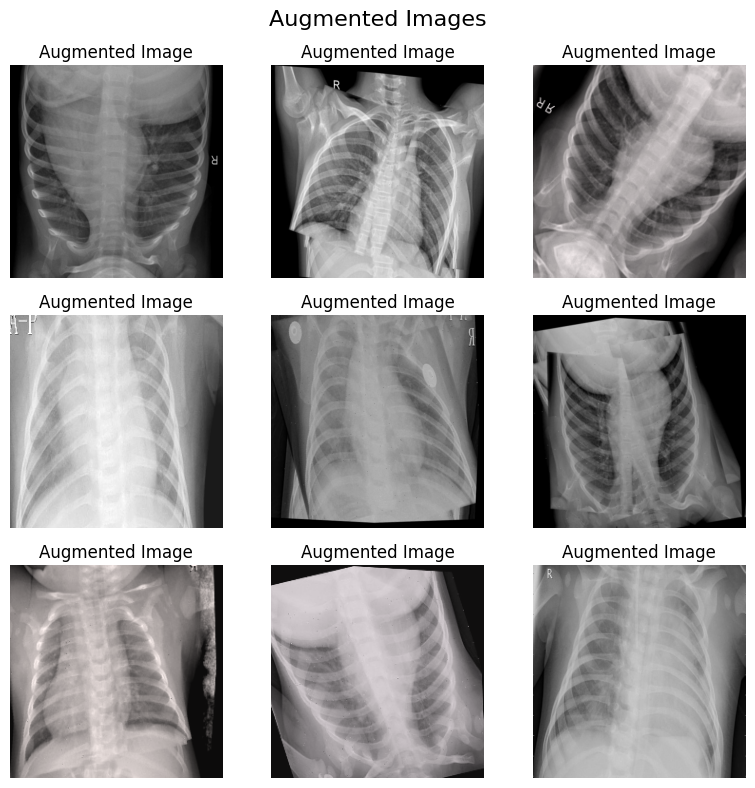

Augmentation completed! Check 'dataset/augmented_train/' folder.


In [17]:
import os
import cv2
import numpy as np
import albumentations as A
import matplotlib.pyplot as plt

# Define augmentation pipeline
augmentations = A.Compose([
    A.HorizontalFlip(p=0.5),  # Flip image horizontally
    A.VerticalFlip(p=0.5),  # Flip image vertically
    A.Rotate(limit=40, p=0.5),  # Rotate within ±40 degrees
    A.RandomBrightnessContrast(p=0.3),  # Adjust brightness and contrast
    A.GaussianBlur(blur_limit=(3, 7), p=0.3),  # Apply Gaussian blur
    A.RandomResizedCrop(height=224, width=224, scale=(0.8, 1.0), p=0.5),
    A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=0.3),  # Color shift
])

# Paths
input_folder = "/kaggle/working/pneumonia-and-normal--3/train/images"  # Change this to your dataset folder
output_folder = "dataset/augmented_train/"
os.makedirs(output_folder, exist_ok=True)

# Select a few images to augment
image_files = [f for f in os.listdir(input_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]
num_images = min(len(image_files), 9)  # Take 9 images for visualization

# Create a plot
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
fig.suptitle("Augmented Images", fontsize=16)

for i in range(num_images):
    img_name = image_files[i]
    img_path = os.path.join(input_folder, img_name)

    # Read image
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Apply augmentation
    augmented = augmentations(image=image)['image']

    # Save new image
    output_path = os.path.join(output_folder, f"aug_{img_name}")
    cv2.imwrite(output_path, cv2.cvtColor(augmented, cv2.COLOR_RGB2BGR))

    # Show in grid
    row, col = i // 3, i % 3
    axes[row, col].imshow(augmented)
    axes[row, col].set_title("Augmented Image")
    axes[row, col].axis("off")

plt.tight_layout()
plt.show()

print("Augmentation completed! Check 'dataset/augmented_train/' folder.")


In [21]:
from ultralytics import YOLO
import pandas as pd

# Load the best trained model
best_model_path = "/kaggle/input/best-model-roboflow/best.pt"
model = YOLO(best_model_path)

# Function to evaluate the model on a dataset split
def evaluate_model(model, split, conf=0.3):
    try:
        print(f"\n🔍 Evaluating on {split.upper()} Set...\n")
        metrics = model.val(split=split, conf=conf)
        return metrics.results_dict
    except Exception as e:
        print(f"❌ Error evaluating {split} set: {str(e)}")
        return None

# ✅ Evaluate on Training, Validation, and Test Sets
train_metrics = evaluate_model(model, "train")
val_metrics = evaluate_model(model, "val")
test_metrics = evaluate_model(model, "test")

# Organizing results into a structured format
metrics_data = {
    "Metric": ["mAP_50", "mAP_50-95", "Precision", "Recall"],
    "Train Set": [train_metrics.get("metrics/mAP_50(B)", "N/A"), 
                  train_metrics.get("metrics/mAP_50-95(B)", "N/A"),
                  train_metrics.get("metrics/precision(B)", "N/A"),
                  train_metrics.get("metrics/recall(B)", "N/A")],
    
    "Validation Set": [val_metrics.get("metrics/mAP_50(B)", "N/A"), 
                       val_metrics.get("metrics/mAP_50-95(B)", "N/A"),
                       val_metrics.get("metrics/precision(B)", "N/A"),
                       val_metrics.get("metrics/recall(B)", "N/A")],

    "Test Set": [test_metrics.get("metrics/mAP_50(B)", "N/A"), 
                 test_metrics.get("metrics/mAP_50-95(B)", "N/A"),
                 test_metrics.get("metrics/precision(B)", "N/A"),
                 test_metrics.get("metrics/recall(B)", "N/A")]
}

# Convert to a DataFrame for clean formatting
df = pd.DataFrame(metrics_data)

# Display the results in a neat format
print("\n📊 **Evaluation Metrics Table:**\n")
print(df.to_string(index=False))

# Save results to a CSV file (optional for documentation)
df.to_csv("yolo_evaluation_metrics.csv", index=False)
print("\n📁 Metrics saved to 'yolo_evaluation_metrics.csv'")



🔍 Evaluating on TRAIN Set...

Ultralytics 8.3.94 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /kaggle/working/pneumonia-and-normal--3/train/labels.cache... 2150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2150/2150 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:57<00:00,  2.35it/s]


                   all       2150       6298      0.943      0.973      0.979      0.836
                NORMAL        823       2334      0.893      0.993      0.972      0.827
             PNEUMONIA       1327       3964      0.994      0.952      0.985      0.845


invalid value encountered in less
invalid value encountered in less


Speed: 0.4ms preprocess, 22.5ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/val2

🔍 Evaluating on VAL Set...

Ultralytics 8.3.94 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /kaggle/working/pneumonia-and-normal--3/valid/labels... 550 images, 0 backgrounds, 0 corrupt: 100%|██████████| 550/550 [00:00<00:00, 1026.32it/s]

val: New cache created: /kaggle/working/pneumonia-and-normal--3/valid/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16<00:00,  2.17it/s]


                   all        550       1602       0.94      0.975      0.966      0.805
                NORMAL        229        641      0.891      0.989       0.95      0.791
             PNEUMONIA        321        961      0.989      0.961      0.982      0.818


invalid value encountered in less
invalid value encountered in less


Speed: 0.7ms preprocess, 24.0ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/val3

🔍 Evaluating on TEST Set...

Ultralytics 8.3.94 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /kaggle/working/pneumonia-and-normal--3/test/labels... 300 images, 0 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:00<00:00, 1027.91it/s]


val: New cache created: /kaggle/working/pneumonia-and-normal--3/test/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.05it/s]


                   all        300        881      0.953      0.965      0.981      0.817
                NORMAL        127        364      0.913      0.992      0.978       0.82
             PNEUMONIA        173        517      0.994      0.939      0.984      0.814


invalid value encountered in less
invalid value encountered in less


Speed: 1.2ms preprocess, 24.4ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/val4

📊 **Evaluation Metrics Table:**

   Metric Train Set Validation Set  Test Set
   mAP_50       N/A            N/A       N/A
mAP_50-95       N/A            N/A       N/A
Precision  0.943351       0.939973   0.95332
   Recall  0.972607       0.974937  0.965396

📁 Metrics saved to 'yolo_evaluation_metrics.csv'


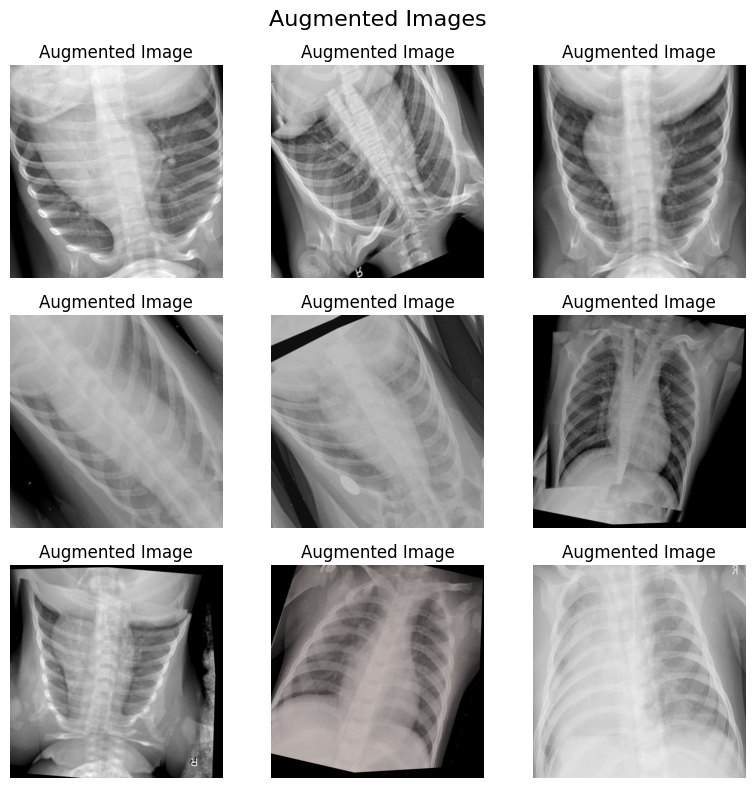

In [18]:
import os
import cv2
import numpy as np
import albumentations as A
import matplotlib.pyplot as plt

# Define augmentation pipeline
augmentations = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.Rotate(limit=40, p=0.5),
    A.RandomBrightnessContrast(p=0.3),
    A.GaussianBlur(blur_limit=(3, 7), p=0.3),
    A.RandomResizedCrop(height=224, width=224, scale=(0.8, 1.0), p=0.5),
    A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=0.3),
])

# Paths
input_folder = "/kaggle/working/pneumonia-and-normal--3/train/images"  # Change this path to your dataset
image_files = [f for f in os.listdir(input_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Check if images exist
if not image_files:
    print("No images found in the folder!")
else:
    num_images = min(len(image_files), 9)

    # Create a plot
    fig, axes = plt.subplots(3, 3, figsize=(8, 8))
    fig.suptitle("Augmented Images", fontsize=16)

    for i in range(num_images):
        img_name = image_files[i]
        img_path = os.path.join(input_folder, img_name)

        # Read image
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Ensure correct color format

        if image is None:
            print(f"Error reading image: {img_path}")
            continue

        # Apply augmentation
        augmented = augmentations(image=image)['image']

        # Show in grid
        row, col = i // 3, i % 3
        axes[row, col].imshow(augmented)
        axes[row, col].set_title("Augmented Image")
        axes[row, col].axis("off")

    plt.tight_layout()
    plt.show()


In [2]:
!pip install ultralytics matplotlib seaborn pandas



In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="LtGiS2TTwXCu3OaccpAs")
project = rf.workspace("biocomputacion1-f4qdt").project("pneumonia-and-normal")
version = project.version(3)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 71.0 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.10.0 requires tensorflow==2.17.0, but you have tensorflow 2.17.1 which is incompatible.
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to pneumonia-and-normal--3 in yolov8:: 100%|██████████| 6012/6012 [00:00<00:00, 8546.28it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [15]:
from ultralytics import YOLO

# Load the trained YOLOv8 model
model = YOLO("/kaggle/input/best-model-roboflow/best.pt")  

# Define paths to your dataset YAML file
dataset_yaml = "/kaggle/working/pneumonia-and-normal--3/data.yaml"

# Function to evaluate the model on a given dataset split
def evaluate_model(split_name):
    metrics = model.val(data=dataset_yaml, split=split_name, project=f"runs/val_{split_name}/", imgsz=640)
    print(f"Validation complete for {split_name}. Check runs/val_{split_name}/ for outputs.")

# Evaluate on all three datasets
evaluate_model("train")  # Train dataset
evaluate_model("val")    # Validation dataset
evaluate_model("test")   # Test dataset


Ultralytics 8.3.94 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /kaggle/working/pneumonia-and-normal--3/train/labels... 2150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2150/2150 [00:01<00:00, 1109.04it/s]


val: New cache created: /kaggle/working/pneumonia-and-normal--3/train/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:56<00:00,  2.37it/s]


                   all       2150       6300      0.943      0.972       0.98      0.829
                NORMAL        842       2390      0.893      0.992      0.967      0.815
             PNEUMONIA       1308       3910      0.993      0.952      0.992      0.842


invalid value encountered in less
invalid value encountered in less


Speed: 0.4ms preprocess, 22.6ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/val_train/val
Validation complete for train. Check runs/val_train/ for outputs.
Ultralytics 8.3.94 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /kaggle/working/pneumonia-and-normal--3/valid/labels... 550 images, 0 backgrounds, 0 corrupt: 100%|██████████| 550/550 [00:00<00:00, 1181.76it/s]

val: New cache created: /kaggle/working/pneumonia-and-normal--3/valid/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:14<00:00,  2.38it/s]


                   all        550       1604      0.941      0.973      0.979      0.801
                NORMAL        220        616      0.886      0.995      0.966       0.79
             PNEUMONIA        330        988      0.996       0.95      0.991      0.812


invalid value encountered in less
invalid value encountered in less


Speed: 0.7ms preprocess, 21.9ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/val_val/val
Validation complete for val. Check runs/val_val/ for outputs.
Ultralytics 8.3.94 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /kaggle/working/pneumonia-and-normal--3/test/labels... 300 images, 0 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:00<00:00, 1193.28it/s]

val: New cache created: /kaggle/working/pneumonia-and-normal--3/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.24it/s]


                   all        300        877      0.954      0.977      0.986      0.817
                NORMAL        117        333      0.919      0.991       0.98      0.816
             PNEUMONIA        183        544      0.988      0.963      0.992      0.819


invalid value encountered in less
invalid value encountered in less


Speed: 1.2ms preprocess, 22.4ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/val_test/val
Validation complete for test. Check runs/val_test/ for outputs.


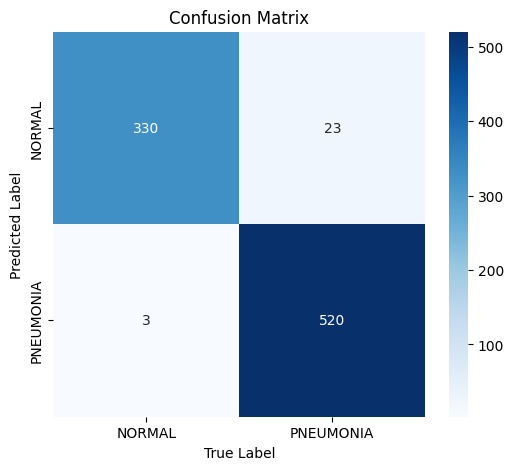

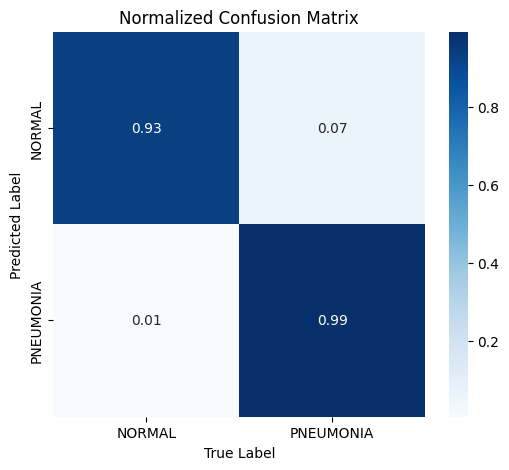

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example: Your original confusion matrix (replace with actual values)
original_cm = np.array([
    [330, 23, 46],   # NORMAL
    [3, 520, 33],    # PNEUMONIA
    [1, 1, 0]        # BACKGROUND (to be removed)
])

# Remove background (last row and last column)
cm_no_background = original_cm[:2, :2]  # Only keep NORMAL and PNEUMONIA

# Class labels without background
labels = ["NORMAL", "PNEUMONIA"]

# Plot the updated confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_no_background, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix")
plt.show()


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Your original confusion matrix (replace with actual values)
original_cm = np.array([
    [330, 23, 46],   # NORMAL
    [3, 520, 33],    # PNEUMONIA
    [1, 1, 0]        # BACKGROUND (to be removed)
])

# Remove background (last row and last column)
cm_no_background = original_cm[:2, :2]  # Keep only NORMAL and PNEUMONIA

# Normalize the matrix (row-wise normalization)
cm_normalized = cm_no_background.astype('float') / cm_no_background.sum(axis=1, keepdims=True)

# Class labels without background
labels = ["NORMAL", "PNEUMONIA"]

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Normalized Confusion Matrix")
plt.show()
